# Projeto 1 - T320 (1S2024)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção para anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão consideradas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Coloque os nomes dos integrantes do grupo no campo de texto abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

## Exercícios

### 1) Exercício sobre classificação multiclasses

Neste exercício, você irá utilizar validação cruzada para encontrar as melhores funções discriminantes que separem quatro classes.

1. Execute a célula abaixo e analise o código e a figura gerada. A figura mostra os exemplos de quatro classes.

**DICAS**

+ Na célula abaixo, o conjunto total de dados é dividido em conjuntos de treinamento e teste.

In [ ]:
# Importe todas os módulos necessários.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import urllib

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Baixa as bases de dados do dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/scl/fi/r9s6n2xyvuo7xwgwd0bav/TwoMoons_and_TwoCircles.csv?rlkey=kfj8m6p8ds9pibtgylcd9llqb&dl=1', 'TwoMoons_and_TwoCirclesP1.csv')
    
# Importa os arquivos CSV.
df = pd.read_csv('./TwoMoons_and_TwoCirclesP1.csv', header=None)

# Obtendo a matriz de atributos e o vetor de rótulos.
X = df[[0, 1]].to_numpy()
y = df[2].to_numpy()

# Plot the classes.
idx0 = np.argwhere(y==0)
idx1 = np.argwhere(y==1)
idx2 = np.argwhere(y==2)
idx3 = np.argwhere(y==3)
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Imprime as dimensões do conjunto total de amostras.
print('Dimensão da matriz de atributos, X:', X.shape)
print('Dimensão do vetor de rótulos, y:', y.shape)

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. Observe a figura acima e responda quais tipos de funções discriminantes, **lineares** ou **não-lineares**, são necessárias para se separar as quatro classes? (**Justifique sua resposta**).

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

3. Neste item, você irá utilizar validação cruzada do tipo k-Fold para encontrar a ordem correta para que funções polinomiais separem as quatro classes perfeitamente. Ao final, plote os resultados obtidos (i.e., média e desvio padrão das acurácias) para que você possa decidir qual é a melhor ordem.

**DICAS**:

+  Instancie um objeto da classe `KFold` com os seguintes parâmetros `n_splits=10` (ou seja, o número de folds, $k$, igual a 10) e `shuffle=True` para embaralhar as amostras.
+ Realize a validação cruzada para polinômios de ordem 1 até 10, inclusive, em passos de 1 unidade.
+ Para a validação cruzada, utilize o conjunto de treinamento.
+ Realize a padronização nos dados de treinamento com um objeto da classe `StandardScaler`.
+ Instancie um objeto da classe `LogisticRegression` com os seguintes parâmetros `multi_class='multinomial'` (para operar como um **regressor softmax**) e `penalty=None` (i.e., não aplica regularização).
+ Configure o parâmetro `scoring` da função `cross_val_score` como `accuracy`.
+ Sempre que possível, use a semente, `seed`, definida no item 1, para configurar o parâmetro `random_state` das funções e classes da biblioteca SciKit-Learn.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).
+ A validação cruzada pode demorar um pouco, portanto, pegue um café e tenha paciência.

In [ ]:
# Digite aqui o código do exercício.

4. Após analisar os resultados acima, qual a melhor ordem a ser utilizada para se separar as quatro classes?

**DICAS**

+ Use o princípio da navalha de Occam para decidar qua é a melhor ordem.

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

5. Usando a melhor ordem para os polinômios de separação, encontrado no item anterior, treine um classificador (i.e., regressor softmax) com esta ordem. Em seguida, calcule a imprima a acurácia deste modelo com os conjuntos de treinamento e validação.

**DICAS**:

+ Realize a padronização nos dados de treinamento com um objeto da classe `StandardScaler`.
+ Instancie um objeto da classe `LogisticRegression` com os seguintes parâmetros `multi_class='multinomial'` (para operar como um **regressor softmax**) e `penalty=None` (i.e., não aplica regularização).
+ Sempre que possível, use a semente, `seed`, definida no item 1, para configurar o parâmetro `random_state` das funções e classes da biblioteca SciKit-Learn.
+ Treine o modelo com o conjunto de treinamento.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

6. Usando o modelo treinado com a melhor ordem para o polinômio de separação, plote as regiões de decisão deste classificador.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Plote a matriz de confusão deste classificador para o **conjunto total de amostras**.

**DICAS**:

+ Não se esqueça que este é um problema de classificação com 4 classes.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

8. Use a função `classification_report` da biblioteca SciKit-Learn para imprimir algumas das métricas de classificação para o **conjunto total de exemplos**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

9. Analise as métricas impressas no item anterior, o que podemos concluir sobre este classificador? (**Justifique sua resposta**).

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

### 2) Classificação binária

Neste exercício, você irá usar um regressor logístico para detectar fraudes com cartões de crédito.

É importante que empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram ou que os clientes tenham suas compras bloqueadas devido um erro das empresas de cartão de crédito.

O conjunto de dados que iremos utilizar contém transações feitas com cartões de crédito em setembro de 2013 por titulares de cartões europeus. Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações legítimas. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) responde por 0.172% de todas as transações.

A base de dados contém 30 atributos, sendo 28 deles com informação desconhecida, devido à sensibilidade dos dados, chamados de `V1` a `V28`, e 2 atributos `Time` e `Amount`. O atributo `Time` se refere ao tempo, em segundos, decorrido entre cada transação e a primeira transação no conjunto de dados. O atributo `Amount` se refere ao valor da transação. O atributo `Time` não será utilizado em nossa análise e, portanto, será descartado.

Temos 2 classes neste problema, a classe `fraude`, denotada pelo valor 1 (classe positiva) e a classe `legítima`, denotada pelo valor 0 (classe negativa).

Infelizmente, devido a questões de confidencialidade, não temos informações sobre os atributos `V1` a `V28`.

**Referência**:

[1] Credit Card Fraud Detection, https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&searchQuery=logistic

[2] Credit Card Fraud Detection, https://towardsdatascience.com/credit-card-fraud-detection-9bc8db79b956

[3] A Gentle Introduction to Imbalanced Classification, https://machinelearningmastery.com/what-is-imbalanced-classification/

[4] Classificação em dados desbalanceados, https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

1. Execute a célula abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Na célula abaixo, o conjunto total de dados é dividido em conjuntos de treinamento e teste.
+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.
+ A coluna `Class` será o valor alvo (i.e., rótulos). Os rótulos são os valores que o modelo é treinado para predizer.
+ O download da base de dados irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [ ]:
# Importe todas as bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Usando pandas para ler a base de dados.
pd.set_option('display.max_columns', None)
card = pd.read_csv('https://www.dropbox.com/s/nlk997opcr8wlet/creditcard.csv?dl=1')

# Selecionando os atributos que serão usados. Iremos descartar o atributo tempo, pois ele não traz informação útil para a classificação.
atributos = [
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]

# Criando o conjunto de pares de treinamento, X e y.
X = card[atributos]
y = card['Class']

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Mostrando os primeiros exemplos da base de dados.
card.head()

2. Execute a célula de código abaixo e analise a quantidade de exemplos de cada classe.

In [ ]:
# Plota histograma com a quantidade de exemplos por classe.
fig, ax = plt.subplots()
bars = ax.bar(['legítima','fraude'], card.Class.value_counts())
ax.bar_label(bars)
plt.yscale('log')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos', fontsize=12)
plt.ylim([1, 1000000])
plt.grid()
plt.show()

3. Após ter analisado a quantidade de exemplos em cada uma das duas classes no item anterior, o que você pode concluir sobre elas?

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

4. Treine um regressor logístico com o conjunto de treinamento e imprima sua acurácia nos conjunto de treinamento e teste.

**DICAS**

+ Configure o parâmetro `random_state` da classe `LogisticRegression` com a semente definida no item 1, ou seja,
```python 
random_state=seed
``` 
+ O treinamento irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [1]:
# Digite aqui o código do exercício.

5. Baseado nos valores de acurácia obtidos no item anterior, responda:

+ Qual foi a acurácia obtida pelo classificador nos conjuntos de treinamento e teste?
+ Você diria que este é um bom classificador, ou seja, um classificador que praticamente acerta todas as predições (i.e., classificações)?
+ O que pode ser feito para nos certificarmos que este é realmente um bom classificador?
+ Observe a expressão para o calculo da acurácia mostrada abaixo:
$$Accuracy = \frac{TN + TP}{TN + TP + FP + FN},$$
onde $TN$, $TP$, $FP$ e $FN$ são os números de verdadeiros negativos, verdadeiros positivos, falsos positivos e falsos negativos, respectivamente.
+ Na equação da acurácia mostrada acima, o que aconteceria se $TN$ fosse 100 vezes ou mais maior que $TP$, $FP$ e $FN$? Essa situação afetaria o cálculo da acurácia? (**Justique sua resposta**).

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

6. Plote a matriz de confusão deste classificador para o conjunto de teste.

In [2]:
# Digite aqui o código do exercício.

7. O que pode ser concluído após a análise da matriz de confusão acima?

**DICAS**

+ Analise os elementos da diagonal principal da matriz. Existem elementos com número muito maior do que outros? Se sim, por que isso ocorre e o acarreta com relação à métrica de avaliação geral de classificadores?

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

8. O objetivo principal deste classificador é **detectar fraudes**, pois elas causam muitos prejuízos às administradoras de cartão de crédito. Neste contexto, a **classe positiva** é a classe das `fraudes` e a **classe negativa** é a classe das transações `legítimas`. Sendo assim, responda:

+ O que é mais prejudicial (ou seja, mais caro) para a administradora de cartão de crédito usando este classificador, a classificação de uma fraude como sendo uma transação legítima ou a classificação de uma transação legítima como sendo uma fraude?
+ A classificação de uma fraude como sendo uma transação legítima é um falso negativo ($FN$) ou um falso positivo ($FP$)?
+ A classificação de uma transação legítima como sendo uma fraude é um falso negativo ($FN$) ou um falso positivo ($FP$)?

**DICAS**

+ Notem que a classificação de uma fraude como sendo uma transação legítima permitiria que transações fraudulentas não fossem bloqueadas ou canceladas, causando prejuízo à administradora de cartão de crédito, enquanto a classificação de uma transação legítima como sendo uma fraude pode fazer com que um e-mail seja enviado ao cliente solicitando que ele verifique a atividade do cartão ou que um analista averigue a transação com mais detalhes.

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

9. A acurácia atingida pelo classificador treinado no item 4 é altíssima, parecendo à primeira vista que ele é um classificador quase perfeito. Entretanto, no caso de uma base de dados desbalanceada (ou seja, com classes desbalanceadas), como a deste exercício, a acurácia não é uma métrica útil para esta tarefa. 

Por exemplo, um classificador pode atingir mais de 99.82% de acurácia nesta tarefa predizendo a classe `legítima` (classe negativa) o tempo todo, ou seja, se ele **sempre** predizer a classe `legítima`, ainda assim, mesmo nunca classificando exemplos da classe `fraude` corretamente, ele terá uma alta acurácia devido ao desbalanceamento das classes (veja a figura abaixo). Portanto, precisamos de outra métrica para mensurar a qualidade deste classificador.

<img src="../../../figures/desbalanced_classes.png" width="300px">

Sendo assim e baseado em suas respostas para o item anterior, responda:

+ Qual é a métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas? Apresenta a equação usada para calcular esta métrica.

**DICAS**

+ Reveja o material de aula onde falamos sobre as métricas utilizadas para mensurar o desempenho de classificadores.

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

10. Calcule e imprima o valor da métrica mais indicada para mensurar a qualidade do classificador usado neste exercício. Use o conjunto de teste para esse cálculo.

In [3]:
# Digite aqui o código do exercício.

11. Após analisar o valor da métrica acima, responda:

+ Qual o valor obtido após o cálculo da métrica?
+ O que você pode concluir a respeito deste classificador, ou seja, ele é bom ou ruim para esta tarefa de detecção de fraudes?

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

12. Será que existe uma forma simples de melhorarmos o desempenho deste classificador? Leia o enunciado abaixo e, na sequência, treine um novo classificador com as instruções descritas abaixo.

O objetivo do classificador treinado neste exercício é o de identificar transações fraudulentas, mas nós não temos muitos desses exemplos positivos (i.e., fraudes) para trabalhar, então nós gostariamos que o classificador **ponderasse fortemente** (ou seja, atribuísse um peso maior) os poucos exemplos positivos disponíveis. 

Isso pode ser feito configurando-se o parâmetro `class_weight` da classe `LogisticRegression` com a string `'balanced'`.  Isso fará com que o modelo **preste mais atenção** aos exemplos de uma classe sub-representada, ou seja, com poucos exemplos.

O modo `balanced` usa os valores de `y`, ou seja, a quantidade de rótulos de cada classe, para calcular automaticamente os pesos de cada classe. Os pesos são inversamente proporcionais às frequências de cada classe, ou seja, o número exemplos de uma classe pelo número total de exemplos. O peso de cada classe é calculado através da seguinte equação: `n_samples / (n_classes * np.bincount(y))`, onde `n_samples` é o número total de exemplos, `n_classes` é o número de classes e `np.bincount(y)` retorna o número de exemplos de cada uma das classes. O objetivo do modo `balanced` é determinar pesos apropriados que dêem mais importância à classe minoritária e menos importância à classe majoritária durante o treinamento do modelo.

Portanto, de posse destas informações, treine um novo regressor logístico que use os pesos das classes para melhorar seu desempenho e imprima seus valores de acurácia e da métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas (esta é a métrica que você usou no item 10). Use o conjunto de teste para calcular as métricas.

**DICAS**

+ Configure o parâmetro `random_state` da classe `LogisticRegression` com a semente definida no item 1, ou seja,
```python 
random_state=seed
``` 
+ Configure o parâmetro `class_weight` da classe `LogisticRegression` com a string `'balanced'`.
```python 
class_weight='balanced'
```
+ O treinamento irá levar um certo tempo, portanto, pegue um café e tenha paciência.

In [4]:
# Digite aqui o código do exercício.

13. Plote a matriz de confusão deste novo classificador.

In [5]:
# Digite aqui o código do exercício.

14. Após observar os resultados das duas métricas calculadas e impressas no item 12 e a matriz de confusão acima, responda:

+ Comparando com os valores obtidos com o primeiro modelo de classificação, houve aumento ou diminuição dos valores das duas métricas?
+ A acurácia teve seu valor diminuído? Se sim, explique o motivo.
+ A segunda métrica, a que você definiu no item 9 e calculou no item 10, teve seu valor aumentado? Se sim, explique o motivo deste aumento.
+ Observe a quantidade de falsos positivos ($FP$), ou seja, a quantidade transações legítimas que são classificadas como sendo fraudes, na matriz de confusão do item anterior. Você acredita que um valor muito alto de falsos positivos causaria algum tipo de prejuízo às administradoras de cartão de crédito, aos clientes ou a ambos? Veja a dica abaixo. (**Justifique sua resposta.**)

**DICAS**

+ Normalmente, quando uma transação é classificada como fraudulenta, mesmo não sendo, a administradora de cartão de crédito envia algum tipo de mensagem (email, sms, whatsapp, etc.) solicitando ao cliente que informe se aquela transação é legítima ou não.

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

### 3) Classificação para detecção de símbolos

Neste exercício, você irá usar um classificador para detectar símbolos de uma modulação digital, a modulação QPSK.

1. Execute a célula abaixo e analise o resultado. A figura mostra símbolos ruidosos da modulação QPSK, onde cada um dos quatro possíveis símbolos é considerado como uma classe diferente.

**DICAS**

+ Notem que na célula de código abaixo, o conjunto de dados já está dividido em conjuntos de treinamento e validação.

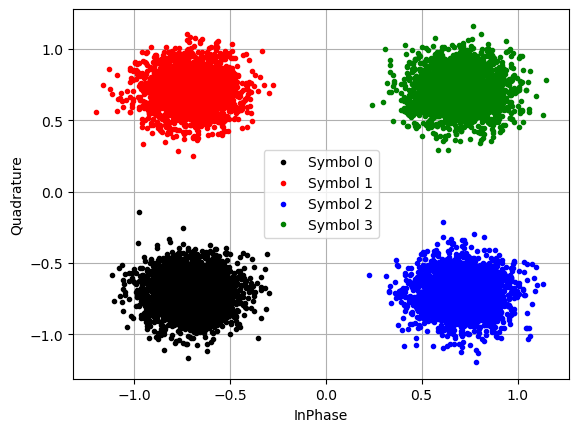

In [6]:
# Import all necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scipy.special import erfc
import seaborn as sns

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Defintion of function used to modulate.
def modulateQPSK(bits):
    symbols_qpsk = [-1.0 - 1j*1.0, -1.0 + 1j*1.0, 1.0 - 1j*1.0, 1.0 + 1j*1.0]
    ip = np.zeros((N, 1), dtype=complex)
    for idx in range(len(bits)):
        ip[idx] = symbols_qpsk[bits[idx]]
    # Normalization of energy to 1.
    symbol = (1.0/np.sqrt(2.0))*ip
    return symbol

# Number of symbols to be transmitted.
N = 10000

# Number of classes.
numOfClasses = 4

# Create Es/N0 vector.
EsN0dB = 15
EsN0Lin = 10.0**(-(EsN0dB/10.0))

# Modulate symbols and add noise.
# Generate QPSK symbols.
bits_qpsk = np.random.randint(0, 4, N)
# Modulate the binary stream into QPSK symbols.
symbols = modulateQPSK(bits_qpsk)   
        
# Pass QPSK symbols through AWGN channel.
noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))    
y = symbols + noise
    
# Create the attribute matrix.
X = np.c_[np.real(y), np.imag(y)]

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, bits_qpsk, test_size=0.3, random_state=seed)
    
# Plot the classes.
idx0 = np.argwhere(bits_qpsk == 0)
idx1 = np.argwhere(bits_qpsk == 1)
idx2 = np.argwhere(bits_qpsk == 2)
idx3 = np.argwhere(bits_qpsk == 3)
plt.plot(np.real(y[idx0.ravel()]), np.imag(y[idx0.ravel()]), 'k.', label='Symbol 0')
plt.plot(np.real(y[idx1.ravel()]), np.imag(y[idx1.ravel()]), 'r.', label='Symbol 1')
plt.plot(np.real(y[idx2.ravel()]), np.imag(y[idx2.ravel()]), 'b.', label='Symbol 2')
plt.plot(np.real(y[idx3.ravel()]), np.imag(y[idx3.ravel()]), 'g.', label='Symbol 3')
plt.grid()
plt.xlabel('InPhase')
plt.ylabel('Quadrature')
plt.legend()
plt.show()

2. Normalmente, treina-se um modelo de aprendizado de máquina para detecção com símbolos gerados com uma relação sinal-ruído (SNR) relativamente alta, como a usada no item anterior. Isso é feito para que o modelo tenha exemplos com sinal e uma certa quantidade de ruído, de forma que ele consiga "aprender" a detectar símbolos mesmo com uma quantidade maior de ruído sendo adicionada aos símbolos. Ou seja, a ideia é que o modelo aprenda a generalizar e detectar símbolos com diversos valores de SNR. Caso o modelo fosse treinado com símbolos gerados com uma SNR baixa, seria muito difícil ele aprender a detectar os símbolos, pois o sinal recebido seria praticamente composto por amostras ruidosas. Se o modelo fosse treinado com símbolos gerados em uma SNR baixa, seria muito difícil para ele aprender a detectar esses símbolos, uma vez que o sinal recebido conteria praticamente apenas ruído.

Sendo assim, neste item, treine um **regressor softmax** com o conjunto de treinamento gerado no item anterior e calcule sua acurácia no conjunto de validação.

**DICAS**

+ Seu classificador deve apresentar uma acurácia de 100%.
+ Para que os próximos itens deste exercício funcionem corretamente, chame seu modelo de `model`.

In [7]:
# Digite aqui o código do exercício.

3. Usando o modelo treinado no item anterior, plote as regiões de decisão deste classificador. Adicionalmente, plote os símbolos corrompidos com ruído que foram gerados no item 1 deste exercício.

In [8]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão deste classificador com os exemplos do conjunto de teste.

In [9]:
# Digite aqui o código do exercício.

5. Observe a matriz de confusão acima e responda: o classificador comete algum erro no conjunto de teste?

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>

6. Neste ítem, você irá comparar a taxa de erro de símbolo obtida pelo classificador treinado com a taxa de erro de símbolo teórica da modulação QPSK. A curva da taxa de erro de símbolo teórica da modulação QPSK é obtida com o detector ótimo para a modulção QPSK.

Sendo assim, execute a célula de código abaixo e analise o resultado obtido.

**DICAS**

+ Para que o código abaixo funcione corretamente, o nome do seu classificador treinado em um dos itens anteriores deve ser `model` .
+ Esta simulação irá demorar, portanto, pegue um café e tenha paciência.

In [ ]:
# Number of symbols to be transmitted.
N = 10000000

# Create Es/N0 vector.
EsN0dB = np.arange(-2,16,2)

# Iterate over all EsN0 values and calculate SER.
ser_simu = np.zeros((len(EsN0dB),))
ser_theo = np.zeros((len(EsN0dB),))
for idx in range(len(EsN0dB)):
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate QPSK symbols.
    bits_qpsk = np.random.randint(0, 4, N)
    # Modulate the binary stream into QPSK symbols.
    symbol = modulateQPSK(bits_qpsk)     

    # Pass QPSK symbols through AWGN channel.
    noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))    
    y = symbol + noise
        
    # Detect received symbol.
    X = np.c_[np.real(y), np.imag(y)]
    detected_symbol = model.predict(X)

    # Count the number of errors.
    error = np.sum(np.abs(detected_symbol - bits_qpsk) > 0)

    # Simulated QPSK SER.    
    ser_simu[idx] = error/N
    
    # Theoretical QPSK SER.    
    ser_theo[idx] = erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0

    # Print Es/N0 versus BER values.
    print('Es/N0:%d \t- SER simu: %e \t- SER theo: %e' % (EsN0dB[idx], ser_simu[idx], ser_theo[idx]))
    
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.xscale('linear')
plt.yscale('log')
plt.grid()
plt.title('QPSK detection')
plt.legend()
plt.xlim([-2, 14])
plt.ylim([1e-5, 1])
plt.show()

7. Após a análise dos resultados acima, podemos dizer que o classificador apresenta boa performance quando comparado com a curva da taxa de erro de símbolo teórica da modulação QPSK? **Justifique sua resposta**.

**DICAS**

+ Lembre-se que a curva da taxa de erro de símbolo teórica da modulação QPSK é obtida com o detector ótimo para esta modulção.

**Resposta**

<span style="color:blue">Escreva sua resposta abaixo.</span>